# Tarea 2 - Máquinas de Aprendizaje
## Metodos Lineales para Clasificación
### Integrantes: Gabriel Jara, Daniel San Martín

## 1 Reducción de Dimensionalidad para Clasificación

Como hemos discutido en clases, la reducción de dimensionalidad es extremadamente importante en análisis de datos, no sólo porque nos permite visualizar y por lo tanto explorar los datos a nuestra disposición, si no que también permite reducir el costo computacional de procesarlos, sino porque reduce de modo significativo el riesgo de *overfitting*. En problemas de clasificación, la técnica que hemos discutido en el capítulo 1 (PCA), puede exhibir resultados diametralmente opuestos a aquello que se busca: preservar la información correspondiente a la clase a la que pertenece un ítem.

<img src="img/img1.png">

Para experimentar con este problema, en esta sección trabajaremos con una colección de sonidos fonéticos que deben ser identificados con vocales del inglés británico. Los datos han sido representados en un espacio de $d = 10$ características. Existen 528 datos de entrenamiento y 462 de pruebas, que pueden ser descargados desde el sitio web mantenido por los autores de nuestro texto guía. El mejor desempeño reportado por los autores corresponde a un 56% de *accuracy*, y es alcanzado por un modelo de vecinos más cercanos y una red neuronal artificial de radio basal.

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL. Determine cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine además el número promedio de palabras por ítem en cada clase.

In [15]:
import urllib
import pandas as pd

#train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
#test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
#train_data_f = urllib.urlretrieve(train_data_url, "data/train_data.csv")
#test_data_f = urllib.urlretrieve(test_data_url, "data/test_data.csv")
train_df = pd.DataFrame.from_csv('data/train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('data/test_data.csv',header=0,index_col=0)
train_df.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [16]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [17]:
train_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,3.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,6.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,9.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,11.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000


In [18]:
test_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,6.000000,-3.246078,2.049102,-0.576076,0.504626,-0.210089,0.681998,-0.029327,0.244162,-0.342820,-0.056221
std,3.165706,0.753377,1.170402,0.671069,0.748236,0.578353,0.544476,0.440483,0.532523,0.505557,0.650602
min,1.000000,-4.982000,-1.074000,-2.091000,-1.044000,-1.733000,-0.405000,-1.282000,-0.949000,-1.409000,-1.241000
25%,3.000000,-3.855750,1.194000,-1.037000,-0.049250,-0.612000,0.278250,-0.310250,-0.167750,-0.721750,-0.564500
50%,6.000000,-3.220000,2.101500,-0.621000,0.418500,-0.181500,0.593000,0.005500,0.245000,-0.358000,-0.257500
75%,9.000000,-2.706500,2.985000,-0.181000,0.960750,0.199000,1.038500,0.245750,0.651500,0.019500,0.594750
max,11.000000,-1.093000,4.314000,1.431000,2.377000,1.114000,2.108000,1.209000,2.039000,0.757000,1.294000


In [19]:
train_df['y'].value_counts()

11    48
10    48
9     48
8     48
7     48
6     48
5     48
4     48
3     48
2     48
1     48
Name: y, dtype: int64

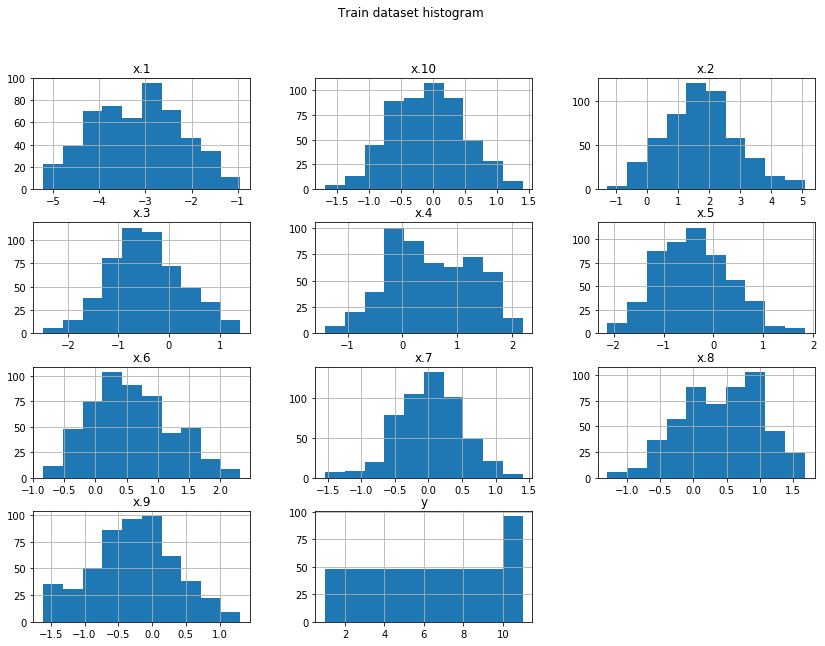

In [20]:
import matplotlib.pyplot as plt

train_df.hist(figsize=(14, 10))
plt.suptitle("Train dataset histogram")
plt.show()

Del análisis anterior podemos corroborar que el número de datos de entrenamiento es de $528$ y datos de prueba $462$. Además, podemos notar que cada clase ($11$) contiene un total de $48$ registros, por lo que el promedio de palabras por clases es justamente $48$.

(b) Construya matrices $X$ e $y$ que contengan las características y las etiquetas correspondientes a los datos de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

In [21]:
from sklearn.preprocessing import StandardScaler

X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

(c) Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando
cada clase con un color distinto (elija una paleta apropiada).

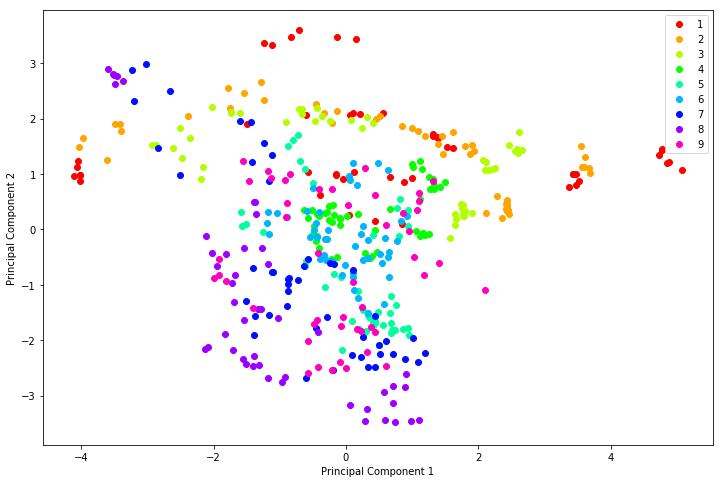

In [22]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('hsv')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

(d) Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando
cada clase con un color distinto (elija una paleta apropiada).

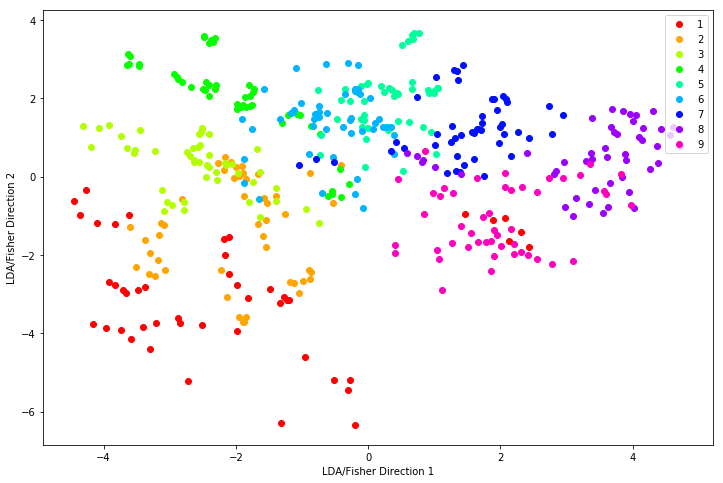

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('hsv')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab, c=col)

plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

(e) Compare cualitativamente los resultados obtenidos en c y d

De los resultados anteriores se puede apreciar una mejor representación con *LDA*, dado que gráficamente pareciera haber una agrupación de datos lo suficientemente dispersa para poder clasificarlos de mejor forma que utilizando *PCA*

(f) Construya un clasificador que determine la clase de un dato x aleatoriamente sin considerar las características
sino que solamente la probabilidad *a-priori* de cada clase. Por ejemplo, si la clase $y = 0$ ocurre el 25% de las veces, su clasificador debe predecir esta clase para un determinado $x$ con probabilidad $0.25$, independiente de los atributos de $x$.

In [24]:
# Probabilidades de cada calse
probs = np.array(train_df['y'].value_counts()/train_df['y'].shape[0])
print "Probabilidades de cada clase:", probs

# Dado que todas las clases tienen la misma probabilidad
# podriamos clasificar un x utilizando una distribucion uniforme discreta
def classif(x):
    return np.random.randint(11) + 1 # Retorna un valor aleatorio unfiforme entre [1, 11]

# Clasificacion de un dato de entrenamiento
classif(train_df.loc[:,'x.1':'x.10'].sample(1))

Probabilidades de cada clase: [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909]


11

(g) Compare el desempeño de LDA, QDA y un modelo de *Vecinos Más Cercanos (k-NN)* $^{†}$ sin reducir dimensionalidad. ¿Qué técnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un gráfico, el efecto de cambiar el parámetro de $k$ en el tercer modelo.

$^{†}$ Este clasificador busca los $k$ datos de entrenamiento más similares al patrón que se quiere clasificar y predice la clase más popular entre estos.

-----LDA-----
0.683712121212
0.443722943723
-----QDA-----
0.988636363636
0.471861471861
-----KNN-----


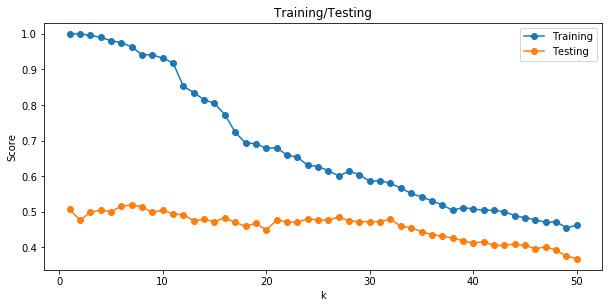

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_std,y)
print "-----LDA-----"
print lda_model.score(X_std,y)
print lda_model.score(X_std_test,ytest)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_std,y)
print "-----QDA-----"
print qda_model.score(X_std,y)
print qda_model.score(X_std_test,ytest)
print "-----KNN-----"
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_std,y)
    knn_scores_training.append(knn_model.score(X_std,y))
    knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

Analizando los resultados, notamos que el mejor valor de *accuracy* para el conjunto de entrenamiento se encuentra con el modelo $k$-NN con $k=1$. Con respecto al conjunto de pruebas el mejor resultado también se obtiene con el $k$-NN pero con un valor de $k=7$.

(h) Utilice PCA para generar una representación de la data en $d'= 1, 2, 3, ... , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

In [26]:
lda_train = np.zeros(10)
lda_test = np.zeros(10)
qda_train = np.zeros(10)
qda_test = np.zeros(10)
knn_train = np.zeros(10)
knn_test = np.zeros(10)


for d in range(1, 11):
    sklearn_pca = PCA(n_components=d)
    Xtrain_pca = sklearn_pca.fit_transform(X_std)
    Xtest_pca = sklearn_pca.fit_transform(X_std_test)
    
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(Xtrain_pca,y)
    lda_train[d-1] = lda_model.score(Xtrain_pca, y)
    lda_test[d-1] = lda_model.score(Xtest_pca, ytest)
    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(Xtrain_pca, y)
    qda_train[d-1] = qda_model.score(Xtrain_pca, y)
    qda_test[d-1] = qda_model.score(Xtest_pca, ytest)

    k = 1
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(Xtrain_pca, y)
    knn_train[d-1] = knn_model.score(Xtrain_pca, y)
    knn_test[d-1] = knn_model.score(Xtest_pca, ytest)

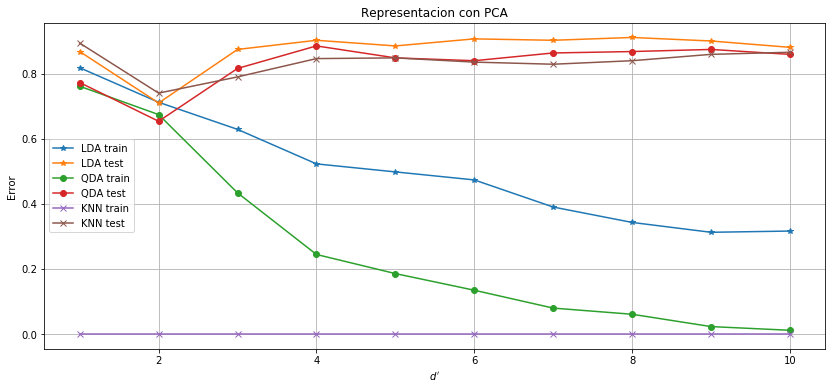

In [27]:
plt.figure(figsize=(14, 6))
D = np.arange(1, 11)
plt.plot(D, 1 - lda_train, marker="*", label="LDA train")
plt.plot(D, 1 - lda_test, marker="*", label="LDA test")
plt.plot(D, 1 - qda_train, marker="o", label="QDA train")
plt.plot(D, 1 - qda_test, marker="o", label="QDA test")
plt.plot(D, 1 - knn_train, marker="x", label="KNN train")
plt.plot(D, 1 - knn_test, marker="x", label="KNN test")
plt.title("Representacion con PCA")
plt.xlabel(r"$d'$")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

Del gráfico podemos notar que el clasificador $k$-NN con $k=1$ obtiene los menores valores de error. En cuanto a los errores de entrenamiento y prueba muestran una tendencia comparable para los algoritmos restantes.

(i) Utilice LDA para generar una representación de la data en $d'= 1, 2, 3, ..., 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

In [28]:
lda_train = np.zeros(10)
lda_test = np.zeros(10)
qda_train = np.zeros(10)
qda_test = np.zeros(10)
knn_train = np.zeros(10)
knn_test = np.zeros(10)


for d in range(1, 11):
    sklearn_lda = LinearDiscriminantAnalysis(n_components=d)
    Xtrain_lda = sklearn_lda.fit_transform(X_std, y)
    Xtest_lda = sklearn_lda.fit_transform(X_std_test, ytest)
    
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(Xtrain_lda,y)
    lda_train[d-1] = lda_model.score(Xtrain_lda, y)
    lda_test[d-1] = lda_model.score(Xtest_lda, ytest)
    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(Xtrain_lda, y)
    qda_train[d-1] = qda_model.score(Xtrain_lda, y)
    qda_test[d-1] = qda_model.score(Xtest_lda, ytest)

    k = 1
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(Xtrain_lda, y)
    knn_train[d-1] = knn_model.score(Xtrain_lda, y)
    knn_test[d-1] = knn_model.score(Xtest_lda, ytest)

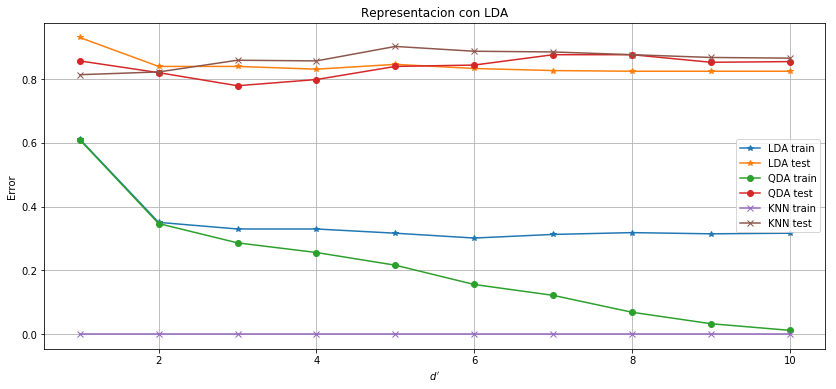

In [29]:
plt.figure(figsize=(14, 6))
D = np.arange(1, 11)
plt.plot(D, 1 - lda_train, marker="*", label="LDA train")
plt.plot(D, 1 - lda_test, marker="*", label="LDA test")
plt.plot(D, 1 - qda_train, marker="o", label="QDA train")
plt.plot(D, 1 - qda_test, marker="o", label="QDA test")
plt.plot(D, 1 - knn_train, marker="x", label="KNN train")
plt.plot(D, 1 - knn_test, marker="x", label="KNN test")
plt.title("Representacion con LDA")
plt.xlabel(r"$d'$")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

Utilizando una representación con *LDA* el comportamiento de los clasificadores es similar al del *PCA*, donde el $k$-NN obtiene los mejores resultados. La única diferencia significativa podría ser el comportamiento oscilatorio entre $d'=1$ y $d'=3$ que se aprecia en la respresentación con *PCA*.

## 2 Análisis de Opiniones sobre Películas

El análisis de sentimiento (o minería de opiniones) se refiere al proceso de extraer información acerca de la actitud que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la *polaridad* de un trozo de texto, es decir, clasificar una determinada evaluación escrita (ó *review*), en que una persona manifiesta una opinión, como *positiva*, *negativa* o *neutral*. La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="img/img2.png">

Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en *Kaggle*, en el contexto de una competencia organizada por la Universidad de Stanford [?]. Cada registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*. Para empezar nos limitaremos a estudiar textos anotados como positivos o negativos, clases que codificaremos como +1 y 0 respectivamente. Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, vamos a necesitar representar los textos $\{d_i\}^n_{i=1}$ disponibles como vectores de características (features). El tipo de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en el texto. Para esto, necesitaremos un *vocabulario* que, para esta actividad, construiremos mediante la unión de todas las palabras que observemos en los textos que tenemos a disposición. Para aumentar la eficacia de las características extraídas es conveniente ejecutar algunas técnicas de preprocesamiento básicas como: pasar todo el texto a minúsculas (lower-casing), eliminar signos de puntuación y eliminar palabras sin significado como artículos, pronombres y preposiciones (stop word removal [4]). Otra técnica que suele ser útil para obtener buenas características (features) es la lematización [6], es decir la reducción de todas las palabras a su tronco léxico base. Una técnica similar y más utilizada en la práctica es el *stemming* [5].

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL local. Determine cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas.

In [30]:
import urllib
import pandas as pd

#train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
#test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
#train_data_f = urllib.urlretrieve(train_data_url, "data/movies_train_data.csv")
#test_data_f = urllib.urlretrieve(test_data_url, "data/movies_test_data.csv")
ftr = open("data/movies_train_data.csv", "r")
fts = open("data/movies_test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print train_df.shape
print test_df.shape

(3554, 2)
(3554, 2)


In [31]:
# Algunos ejemplos
train_df.sample(5)

,Sentiment,Text
2621,-1,much-anticipated and ultimately lackluster mov...
1453,1,at its best . . . festival in cannes bubbles w...
432,-1,two hours of junk .\n
3367,1,has a solid emotional impact .\n
3143,-1,"the tuxedo wasn't just bad ; it was , as my fr..."


In [32]:
train_df['Sentiment'].value_counts()

-1    1784
 1    1770
Name: Sentiment, dtype: int64

In [33]:
test_df['Sentiment'].value_counts()

-1    1803
 1    1751
Name: Sentiment, dtype: int64

Para el conjunto de entrenamiento existen $1770$ comentarios positivos y $1784$ negativos. Para el conjunto de pruebas existen $1751$ comentarios positivos y $1803$ negativos.

(b) Construya una función, denominada *word_extractor*, que devuelva una lista de las palabras contenidas en un determinado un trozo de texto. Incorpore en su función las operaciones de lower-casing y stemming. Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con los resultados obtenidos si no se hace stemming.

In [34]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor(text, stemming=True):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    
    if stemming is True:
        wordtokens = [ ps.stem(word.lower()) \
            for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    else:
        wordtokens = [ word.lower() \
            for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
            
    return words

print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")
print word_extractor("I Love EATING CAKE")
print word_extractor("I love to eat cakes")
print word_extractor("I'm loving to eat cakes")
print word_extractor("eated eated eated")

 love eat cake
 love eat cake
 love eat cake
 not love eat cake
 n't love eat cake
 love eat cake
 love eat cake
 'm love eat cake
 eat eat eat


In [35]:
# Sin usar stemming
print word_extractor("I love to eat cake", False)
print word_extractor("I love eating cake", False)
print word_extractor("I loved eating the cake", False)
print word_extractor("I do not love eating cake", False)
print word_extractor("I don't love eating cake", False)
print word_extractor("I Love EATING CAKE", False)
print word_extractor("I love to eat cakes")
print word_extractor("I'm loving to eat cakes", False)
print word_extractor("eated eated eated", False)

 love eat cake
 love eating cake
 loved eating cake
 not love eating cake
 n't love eating cake
 love eating cake
 love eat cake
 'm loving eat cakes
 eated eated eated


In [36]:
text = "Far far away, behind the word mountains, far from the countries Vokalia \
    and Consonantia, there live the blind texts. Separated they live in Bookmarksgrove \
    right at the coast of the Semantics, a large language ocean."

print word_extractor(text)
print word_extractor(text, False)

 far far away , behind word mountain , far countri vokalia consonantia , live blind text . separ live bookmarksgrov right coast semant , larg languag ocean .
 far far away , behind word mountains , far countries vokalia consonantia , live blind texts . separated live bookmarksgrove right coast semantics , large language ocean .


La función implementada aplica Tokenize para identificar las palabras dentro del texto, transforma todas las letras a minúsculas, utiliza Stopwords para remover palabras demasiado comunes para ser relevantes y extrae la raíz de las palabras aplicando Stemmer. Esta última herramienta permite obtener una reduccion de cada palabra de forma que diversas conjugaciones sean reconocidas como equivalentes al momento de aplicar los algoritmos de minería de texto. 

Se aprecia por las frases utilizadas como ejemplo que la función cumple con los efectos antes mencionados. 

(c) Construya una función, denominada *word_extractor2*, análoga a la función anterior, pero que lematice las palabras en vez de hacer stemming. Pruebe la función con las frases sugeridas en el código anterior y discuta las diferencias que observa.

In [37]:
def word_extractor2(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower()) \
        for word in word_tokenize(text.decode('utf-8','ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    
    return words

print word_extractor2("I love to eat cake")
print word_extractor2("I love eating cake")
print word_extractor2("I loved eating the cake")
print word_extractor2("I do not love eating cake")
print word_extractor2("I don't love eating cake")
print word_extractor2("I Love EATING CAKE")
print word_extractor2("I love to eat cakes")
print word_extractor2("I'm loving to eat cakes")
print word_extractor2("eated eated eated")

 love eat cake
 love eating cake
 loved eating cake
 not love eating cake
 n't love eating cake
 love eating cake
 love eat cake
 'm loving eat cake
 eated eated eated


In [38]:
print word_extractor2(text)

 far far away , behind word mountain , far country vokalia consonantia , live blind text . separated live bookmarksgrove right coast semantics , large language ocean .


Se implementa una segunda versión de la formula de extracción de palabras, esta vez usando Lemmatizer, una alternativa a Stemmer. Esta técnica hace uso de análisis morfológico para extraer una palabra lema representativa de cada termino presente en el documento. Stemmer, por otra parte, se limita a identificar una cadena de caractéres báse, pero no profundiza en la forma de las palabras. Esto implica que stemmer tenderá a ser menos preciso que lemmatizer, pudiendo reducir a una misma raíz dos términos no relacionados que compartan los mismos carácteres iniciales, independiente de si están cumpliendo una función distinta en la horación, a una raíz común que no necesariamente será una palabra real. Lemmatizer, en cambio, reconoce la función de cada termino y busca la palabra que mejor le represente, para lo cual necesita recurrir a diccionarios. 

En los ejemplos analizados se observa que Lemmatizer trata distinto los términos que están siendo utilizados como verbos respecto a cuando son sustantivos, pese a que tengan la misma base de caracteres. Por ejemplo eating es un verbo distinto de eat que es un sustantivo. 

Es posible que este comportamiento sea insuficiente para los objetivos del proceso de reducción de términos a una base, por lo que se evalúa otra configuración de Lemmatizer que permite que todos los  términos sean tratados como si fueran verbos, de forma de asegurar la reduccíon de las palabras. 

In [39]:
def word_extractor3(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower(), "v") \
        for word in word_tokenize(text.decode('utf-8','ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    
    return words

print word_extractor3("I love to eat cake")
print word_extractor3("I love eating cake")
print word_extractor3("I loved eating the cake")
print word_extractor3("I do not love eating cake")
print word_extractor3("I don't love eating cake")
print word_extractor3("I Love EATING CAKE")
print word_extractor3("I love to eat cakes")
print word_extractor3("I'm loving to eat cakes")
print word_extractor3("eated eated eated")

 love eat cake
 love eat cake
 love eat cake
 not love eat cake
 n't love eat cake
 love eat cake
 love eat cake
 'm love eat cake
 eat eat eat


La tercera versión de la función de extracción de palabras asume que cada termino es un verbo al utilizar Lemmatizer. Se aprecia, en los ejemplos, que el resultado fue similar al que generaba Stemmer, siendo este último un método de uso más general, por lo que no se encuentra ventaja en usar Lemmatizer con la presunción de verbo. 

In [40]:
# Version corregida por Francisco Casas
from nltk import pos_tag

def get_wordnet_tag(tag):
    if tag.startswith('JJ'):
        return 'a'
    elif tag.startswith('RB') or tag == "WRB":
        return 'r'
    elif tag.startswith('NN') or tag.startswith("WP"):
        return 'n'
    elif tag.startswith('VB'):
        return 'v'
    else:
        return None
    
def lemmatize_words(lemmatizer,words):
    tagged = pos_tag(words)
    lemmas = []
    for word, tag in tagged:
        wntag = get_wordnet_tag(tag)
        if wntag is None:
            lemma = lemmatizer.lemmatize(word)
        else:
            lemma = lemmatizer.lemmatize(word,pos=wntag)
        lemmas.append(lemma)
    return lemmas

def word_extractor4(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    
    wordtokens = [ wordlemmatizer.lemmatize(word.lower(), 'v') \
        for word in word_tokenize(text.decode('utf-8','ignore')) ]
    
    #wordtokens = lemmatize_words(wordlemmatizer, word_tokenize(text))
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

In [41]:
print word_extractor4("I love to eat cake")
print word_extractor4("I love eating cake")
print word_extractor4("I loved eating the cake")
print word_extractor4("I do not love eating cake")
print word_extractor4("I don't love eating cake")

 love eat cake
 love eat cake
 love eat cake
 not love eat cake
 n't love eat cake


In [42]:
print word_extractor4(text)

 far far away , behind word mountains , far countries vokalia consonantia , live blind texts . separate live bookmarksgrove right coast semantics , large language ocean .


(d) Utilizando la función *CountVectorizer* de la librería *sklearn* y de acuerdo a las directrices mencionadas
en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras más frecuentes en el conjunto de entrenamiento y pruebas.

Se analizará en primer lugar los resultados obtenidos utilizando Stemmer en la función de extracción de datos. 

In [43]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist_train = list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))

data_train = []
data_test = []

for tag, count in zip(vocab, dist_train):
    data_train.append([count, str(tag)])
    #print count, tag
    
for tag, count in zip(vocab, dist_test):
    data_test.append([count, str(tag)])

In [44]:
# Palabras mas frecuentes en los datos de train y test
print sorted(data_train, reverse=True)[:10]
print sorted(data_test, reverse=True)[:10]

[[574, 'film'], [477, 'movi'], [425, 'thi'], [269, 'not'], [268, 'like'], [245, 'one'], [224, 'ha'], [207, 'make'], [179, 'hi'], [176, 'stori']]
[[572, 'film'], [530, 'movi'], [514, 'thi'], [281, 'not'], [250, 'one'], [248, 'like'], [238, 'ha'], [196, 'stori'], [187, 'make'], [184, 'hi']]


El efecto de haber usado Stemmer se hace patente al análizar los términos más frecuentes, los cuales se presentan cortados a su raiz. 

(e) Construya una función que evalúe el desempeño obtenido por un clasificador genérico en el conjunto de entrenamiento y en el conjunto de pruebas. Utilice y explique las métricas que calcula la función *classification_report* de la librería *sklearn*.

In [45]:
from sklearn.metrics import classification_report

def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(features_train.toarray(), labels_train)
score_the_model(lda_model, features_train.toarray(), labels_train, features_test.toarray(), labels_test, 'LDA')

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Training Accuracy LDA: 0.993247
Test Accuracy LDA: 0.561497
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.56      0.59      0.58      1803
          -       0.56      0.53      0.54      1751

avg / total       0.56      0.56      0.56      3554



In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(features_train.toarray(), labels_train)
score_the_model(qda_model, features_train.toarray(), labels_train, features_test.toarray(), labels_test, 'QDA')

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training Accuracy QDA: 1.000000
Test Accuracy QDA: 0.491416
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.50      0.42      0.46      1803
          -       0.49      0.57      0.52      1751

avg / total       0.49      0.49      0.49      3554



In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(features_train.toarray(), labels_train)
score_the_model(knn_model, features_train.toarray(), labels_train, features_test.toarray(), labels_test, 'KNN')

Training Accuracy KNN: 0.730445
Test Accuracy KNN: 0.589643
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.57      0.76      0.65      1803
          -       0.63      0.42      0.50      1751

avg / total       0.60      0.59      0.58      3554



Las métricas presentadas son:

Accuracy, corresponde al volumen de observaciones bien clasificadas, sobre la totalidad de observaciones predichas. 

Recall, es la proporción de observaciones de una clase que son correctamente clasificadas como tal. Es una medida del éxito del modelo predictivo en rescatar la mayor cantidad de observaciones de la clase posibles. De los modelos probados tanto LinearDiscriminantAnalysis como KNeighborsClassifier obtienen un Recall promedio similar, sin embargo el primero logra valores similares para ambas clases, a diferencia de KNeighborsClassifier que privilegia la prediccion de una clase sobre la otra, pese a no existir desbalance, con lo que logra alto Recall para una clase y bajo para otra. 

Precision, es la proporción de observaciones correctamente clasificadas de entre todas las que fueron predichas de una clase. Es una medida de la confiabilidad que ofrece el modelo cuando predice en una clase una observación. De los modelos probados KNeighborsClassifier obtuvo los mejores Precision en ambas clases. 

F1-score, es la media armónica entre la Precision y Recall. Se utiliza como alternativa para obtener un indicador que recoja estos dos aspectos contrapuestos, en un único ratio. De los modelos comparados LinearDiscriminantAnalysis logra mayor F1-score, lo cual da cuenta de que es un modelo que equilibra mejor Precision y Recall para ambas clases. 

De los tres algoritmos evaluados, KNeighbors presenta mejor Accuracy, Recall, Precision y F1-score. 

Se repite a continuación el experimento, esta vez usando Lemmatizer en la función de extracción de palabras. 

In [49]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist_train = list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))

data_train = []
data_test = []

for tag, count in zip(vocab, dist_train):
    data_train.append([count, str(tag)])
    #print count, tag
    
for tag, count in zip(vocab, dist_test):
    data_test.append([count, str(tag)])

In [50]:
# Palabras mas frecuentes en los datos de train y test
print sorted(data_train, reverse=True)[:10]
print sorted(data_test, reverse=True)[:10]

[[566, 'film'], [481, 'movie'], [266, 'not'], [246, 'one'], [245, 'like'], [224, 'ha'], [183, 'make'], [176, 'story'], [163, 'character'], [145, 'comedy']]
[[558, 'film'], [540, 'movie'], [278, 'not'], [250, 'one'], [238, 'ha'], [230, 'like'], [197, 'story'], [175, 'character'], [165, 'time'], [161, 'make']]


Claramente el uso de Lemmatize facilita la legibilidad de los términos más frecuentes, aunque es posible que algunos terminos que pudieron o debieron ser asimilados no lo fueran, perjudicando la medida de su frecuencia real. 

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(features_train.toarray(), labels_train)
score_the_model(lda_model, features_train.toarray(), labels_train, features_test.toarray(), labels_test, 'LDA')

Training Accuracy LDA: 0.991840
Test Accuracy LDA: 0.583732
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.59      0.58      0.59      1803
          -       0.58      0.59      0.58      1751

avg / total       0.58      0.58      0.58      3554



El uso de Lemmatize en lugar de Stemmer aportó a un mejor desempeño de LDA (Linear Discriminant Analyzis). 

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(features_train.toarray(), labels_train)
score_the_model(qda_model, features_train.toarray(), labels_train, features_test.toarray(), labels_test, 'QDA')

Training Accuracy QDA: 1.000000
Test Accuracy QDA: 0.485505
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.49      0.51      0.50      1803
          -       0.48      0.46      0.47      1751

avg / total       0.49      0.49      0.49      3554



In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(features_train.toarray(), labels_train)
score_the_model(knn_model, features_train.toarray(), labels_train, features_test.toarray(), labels_test, 'KNN')

Training Accuracy KNN: 0.684862
Test Accuracy KNN: 0.583169
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.56      0.83      0.67      1803
          -       0.66      0.32      0.43      1751

avg / total       0.61      0.58      0.55      3554



El uso de Lemmatizer en lugar de Stemmer no significó una mejora significativa para KNeighbors, que sigue siendo el algoritmo mejor evaluado de los tres, puesto que si bien incrementa levemente el Recall lo hace a costa de menor Precision, alcanzando además menor Accuracy y F1-score. 

(f) Construya una función que entrene/ajuste un clasificador *Bayesiano Ingenuo (Binario)* (las características
no nulas serán tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las características extraídas en el punto (d). Mida el efecto de filtrar *stopwords* y de eliminar este paso de pre-procesamiento típico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [27]:
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.958920
Test Accuracy BernoulliNB: 0.738249
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.87321944  0.12678056] such a fine idea for a film , and such a stultifying , lifeless execution .

[ 0.21836018  0.78163982] this is simply the most fun you'll ever have with a documentary !

[ 0.13550865  0.86449135] one of the best examples of how to treat a subject , you're not fully aware is being examined , much like a photo of yourself you didn't know was being taken .

[ 0.10492176  0.89507824] gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .

[ 0.05524006  0.94475994] this bracingly truthful antidote to hollywood teenage movies that slather clearasil over the blemishes of youth c

Se aprecia que la calidad de las predicciones es bastante buena. Para el primer ejemplo analizado, por ejemplo, la predicción es neutral y en efecto el texto ofrece una visión positiva para un grupo de personas (religiosas) y negativa para el resto. El segundo caso se predice con 87% de probabilidad de ser positivo, y en efecto el texto alaba la película. El tercer ejemplo en cambio se predice negativo con 83%, correspondiendo claramente al texto que acusa al film en duros términos. En general se repite en todas las observaciones resultados de este tipo. 

(g) Construya una función que entrene/ajuste una *Máquina de Vectores de Soporte (SVM) Lineal* y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización $C$. Discuta el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraídos en el punto (d). Mida el efecto de filtrar *stopwords* y de eliminar este paso de pre-procesamiento típico. Determine además, qué representaciṕn obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

Se analiza en primer lugar la situación en la que no se usan Stopwords, es decir todos los términos permaneceran en el texto. Se utlizará Stemmer para la reducción de los términos.  

In [54]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor(text):
    ps = PorterStemmer()
    #commonwords = stopwords.words('english')
    commonwords = []
    #commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ ps.stem(word.lower()) \
        for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
            
    return words

print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")
print word_extractor("I Love EATING CAKE")
print word_extractor("I love to eat cakes")
print word_extractor("I'm loving to eat cakes")
print word_extractor("eated eated eated")

 i love to eat cake
 i love eat cake
 i love eat the cake
 i do not love eat cake
 i do n't love eat cake
 i love eat cake
 i love to eat cake
 i 'm love to eat cake
 eat eat eat


In [55]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist_train = list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))

data_train = []
data_test = []

for tag, count in zip(vocab, dist_train):
    data_train.append([count, str(tag)])
    #print count, tag
    
for tag, count in zip(vocab, dist_test):
    data_test.append([count, str(tag)])

El parámetro de regularización C multiplica los errores obtenidos por el modelo, por lo que es una forma de castigar las observaciones mal clasificadas. Un parámetro alto hará que SVM busque un hiperplano de margen más estrecho, es decir con observaciones muy cernanas, en la medida que logre menor cantidad de observaciones mal clasificadas, respecto de un hiperplano de mayor márgen que entregue mayor cantidad de mal clasificados. Por lo mismo, un parámetro de regularización muy alto puede facilitar el sobreajuste del modelo.  

In [56]:
from sklearn.svm import LinearSVC

def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "C Value: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        
do_SVM(features_train,labels_train,features_test,labels_test)

C Value: 0.010000
Training Accuracy SVM: 0.869162
Test Accuracy SVM: 0.731213
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.74      0.74      1803
          -       0.73      0.72      0.72      1751

avg / total       0.73      0.73      0.73      3554

C Value: 0.100000
Training Accuracy SVM: 0.983399
Test Accuracy SVM: 0.740501
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.74      0.74      1803
          -       0.73      0.74      0.74      1751

avg / total       0.74      0.74      0.74      3554

C Value: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.717422
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.70      0.72      1803
          -       0.70      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

C Valu

A continuación se repetirá el experimento, esta vez quitando los Stopwords. Se continua usando Stemmer.

In [57]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor(text):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ ps.stem(word.lower()) \
        for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
            
    return words

print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")
print word_extractor("I Love EATING CAKE")
print word_extractor("I love to eat cakes")
print word_extractor("I'm loving to eat cakes")
print word_extractor("eated eated eated")

 love eat cake
 love eat cake
 love eat cake
 not love eat cake
 n't love eat cake
 love eat cake
 love eat cake
 'm love eat cake
 eat eat eat


In [58]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist_train = list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))

data_train = []
data_test = []

for tag, count in zip(vocab, dist_train):
    data_train.append([count, str(tag)])
    #print count, tag
    
for tag, count in zip(vocab, dist_test):
    data_test.append([count, str(tag)])

In [59]:
from sklearn.svm import LinearSVC

def do_SVM(x,y,xt,yt):
    Cs = [0.001, 0.01,0.1,10,100,1000 ]
    for C in Cs:
        print "C Value: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        
do_SVM(features_train,labels_train,features_test,labels_test)

C Value: 0.001000
Training Accuracy SVM: 0.775746
Test Accuracy SVM: 0.687869
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.73      0.70      1803
          -       0.70      0.65      0.67      1751

avg / total       0.69      0.69      0.69      3554

C Value: 0.010000
Training Accuracy SVM: 0.872257
Test Accuracy SVM: 0.729243
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.75      0.74      1803
          -       0.73      0.71      0.72      1751

avg / total       0.73      0.73      0.73      3554

C Value: 0.100000
Training Accuracy SVM: 0.981992
Test Accuracy SVM: 0.731213
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.74      0.73      0.73      1803
          -       0.73      0.73      0.73      1751

avg / total       0.73      0.73      0.73      3554

C Value

En ambos experimentos, con Stopwords y sin ellas, SVM obtiene mejor resultado con parámetro de regularización C = 0.1, tanto respecto el Accuracy como F1-score. Se aprecia además que tiene un resultado levemente mejor cuando no se elimina los Stopwords, siempre sobre la muestra de testeo. La eliminación de los Stopword, si bien aportan eficiencia al aprendizaje, aparentemente restan capacidad predictiva al modelo. 

A continuación se reemplazará Stemmer por Lemmatizer, y se evaluará nuevamente el modelo, usando la versión del data set que sí contiene los Stopwords. 

In [60]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor2(text):
    wordlemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()
    #commonwords = stopwords.words('english')
    commonwords = []
    #commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower()) \
        for word in word_tokenize(text.decode('utf-8','ignore')) ]
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
            
    return words

print word_extractor2("I love to eat cake")
print word_extractor2("I love eating cake")
print word_extractor2("I loved eating the cake")
print word_extractor2("I do not love eating cake")
print word_extractor2("I don't love eating cake")
print word_extractor2("I Love EATING CAKE")
print word_extractor2("I love to eat cakes")
print word_extractor2("I'm loving to eat cakes")
print word_extractor2("eated eated eated")

 i love to eat cake
 i love eating cake
 i loved eating the cake
 i do not love eating cake
 i do n't love eating cake
 i love eating cake
 i love to eat cake
 i 'm loving to eat cake
 eated eated eated


In [61]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist_train = list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))

data_train = []
data_test = []

for tag, count in zip(vocab, dist_train):
    data_train.append([count, str(tag)])
    #print count, tag
    
for tag, count in zip(vocab, dist_test):
    data_test.append([count, str(tag)])

In [62]:
from sklearn.svm import LinearSVC

def do_SVM(x,y,xt,yt):
    Cs = [0.001, 0.01,0.1,10,100,1000 ]
    for C in Cs:
        print "C Value: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        
do_SVM(features_train,labels_train,features_test,labels_test)

C Value: 0.001000
Training Accuracy SVM: 0.720034
Test Accuracy SVM: 0.665072
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.67      0.68      0.67      1803
          -       0.66      0.65      0.66      1751

avg / total       0.67      0.67      0.67      3554

C Value: 0.010000
Training Accuracy SVM: 0.873382
Test Accuracy SVM: 0.719111
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.72      0.72      1751

avg / total       0.72      0.72      0.72      3554

C Value: 0.100000
Training Accuracy SVM: 0.987901
Test Accuracy SVM: 0.738249
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

C Value

Nuevamente el mejor desempeño de SVM se produce con parámetro de regularizacion $C = 0.1$. El uso de Lemmatizer en lugar de Stemmer, sin embargo, perjudica la capacidad predictiva del modelo. 

## 3 Fraude en transacciones bancarias

El mundo está más globalizado, servicios que antes solo se podían hacer de manera presencial hoy en día están disponibles de forma electrónica, el más claro ejemplo de esto son las transacciones bancarias. La ventaja de este cambio es que cualquier persona en el mundo puede enviar dinero de un lado a otro en cosa de segundos, por consecuencia, la cantidad de transacciones aumentó mucho. La desventaja es que es más fácil cometer fraudes, debido a que las únicas barreras de protección que tenemos ante estas malas prácticas son códigos de seguridad (Clave secreta, matriz de números, etc.) que si caen en manos de gente deshonesta lo más probable es que se comenta algún tipo fraude. 

En esta sección utilizaremos un dataset de *Kaggle* [3] que contiene transacciones bancarias, el desafío está en que sus clases están desbalanceadas, por lo tanto, utilizaremos 3 técnicas para hacer frente a este problema. El *dataset* contiene transacciones hechas por tarjetas de créditos europeas durante un periodo de 2 díaas, donde 492 de 284807 fueron fraudulentas. Cada dato tiene como atributo 28 componentes principales obtenidos por PCA (Esto se hace para enmascarar datos sensibles), una variable tiempo y el monto de la transacción.

(a) Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

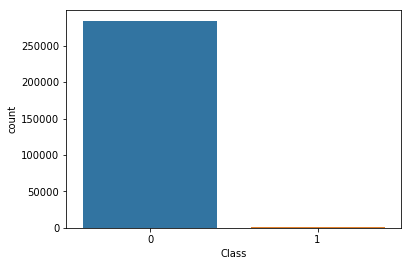

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dt = pd.read_csv("data/creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

(b) Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [65]:
from sklearn.preprocessing import StandardScaler

dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
dt.drop(["Time","Amount"],axis=1,inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


En este caso fue necesario estandarizar sólo el atributo "monto" debido a que los otros 28 atributos presentes en los datos son componentes principales obtenidos con PCA. Al observar los valores de dichos atributos se aprecia que, aparentemente, son resultado de PCA estandarizado, es decir los atributos originales fueron estandarizados antes de obtener los componentes principales. 

(c) Defina una función que reciba como *input* un modelo, los datos de entrenamiento y datos de testeo. Esta función deberá mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas métricas. Deberá además mostrar una curva ROC junto al valor del área bajo la curva de esta. Finalmente, responda las siguientes preguntas ¿Qué es una matriz de confusión? ¿Que métricas se pueden calcular de esta y cuales nos serán útiles en este experimento? ¿Que es una curva ROC y qué relación tiene con la matriz de confusión?

In [66]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

def model(model,features_train,features_test,labels_train,labels_test):
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print "The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+
    cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))
    print "TP: %d"%cnf_matrix[1,1,]
    print "TN: %d"%cnf_matrix[0,0]
    print "FP: %d"%cnf_matrix[0,1]
    print "FN: %d"%cnf_matrix[1,0]
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "\n----------Classification Report------------------------------------"
    print classification_report(labels_test,pred)
    
    fpr, tpr, thresholds = roc_curve(labels_test, pred)
    auc_roc = auc(fpr,tpr)
    
    print " ROC Curve: "
    plt.plot(fpr,tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc_roc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc="lower right")
    plt.show()     

Se conoce como Matriz de Confusión al conjunto de las siguientes cuatro métricas: true positive (TP), true negative (TN), false positive (FP), false negative (FN). Los falsos positivos son también lo que se suele denominar Error tipo I, es decir observaciones que el modelo predijo como positivas pero en realidad eran negativas. Los falsos negativos corresponden al error de tipo II, es decir observaciones que siendo positivas, fueron predichas como negativas. Estas cuatro métricas se suelen presentar como una matriz de cuatro cuadrantes, notación de la que proviene el nombre Matriz de Confusión. 

Algunas de las métricas más relevantes que se obtienen a partir de la Matriz de Confusión son:

Accuracy, corresponde al volumen de obsrvaciones bien clasificadas, sobre la totalidad de observaciones predichas. Si bien es uno de los indicadores más básicos, tiene la desventaja de que frente a muestras muy desbalanceadas un modelo que se limite a privilegiar la clase dominante podrá fácilmente mejorar su Accuracy, sin ganar verdadero proder predictivo. 

Recall, es la proporción de observaciones positivas que son correctamente clasificadas como tal. Es una medida del éxito del modelo predictivo en rescatar la mayor cantidad de observaciones positivas posibles.

Precision, es la proporción de observaciones correctamente clasificadas de entre todas las que fueron predichas como positivas. Es una medida de la confiabilidad que ofrece el modelo cuando predice como positiva una observación. 

Recall y Precisión suelen ser presentadas en conjunto ya que reflejan la transacción natural que un modelo predictivo hace entre privilegiar un mayor número de observaciones positivas detectadas versus la seguridad de las mismos predicciones. Un modelo puede fácilmente aumentar su Recall por la vía de declarar positivo mayor volumen de observaciones, pero sacrificará con esto su Precision. Analogamente, mejorar la Precision disminuyendo la cantidad de observaciones predichas como positivas perjudicará el Recall. 

F1-score, es la media armónica entre la Precision y Recall. Se utiliza como alternativa para obtener un indicador que recoja estos dos aspectos contrapuestos, en un único ratio. 

(d) Defina una función que genere un *Training* y *Testing Set* de un *Dataset* cualquiera. Indique que está
haciendo la función.

In [67]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    print "Length of training data: %d"%len(x_train)
    print "Length of test data: %d"%len(x_test)
    return(x_train,x_test,y_train,y_test)

En primer lugar se separó los atributos de las clases, y a continuación se dividió dicha data en una muestra de entrenamiento y otra de testeo. 

(e) Defina una función que realice *Undersample* [8] . ¿Explique en que consiste esta técnica?

In [68]:
def undersample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,
    (times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    normal = (float(len(undersample_data[undersample_data.Class==0]))/len(undersample_data["Class"]))
    print "The normal transacation proportion is : %f"%normal
    fraud = (float(len(undersample_data[undersample_data.Class==1]))/len(undersample_data["Class"]))
    print "The fraud transacation proportion is : %f"%fraud
    return(undersample_data)

Dado que la muestra esta desbalanceada, lo cual generaría problemas de aprendizaje y modelos que probablemente priviligiarán a la clase dominante (esbirros del capitalismo), se recurre la técnica de "Undersample" que consiste en utilizar un subconjunto de la muestra de entrenamiento, sobrerepresentando la clase minotiraria (positivas). Esto significa que necesariamente se utilizará una fracción muy pequeña de las observaciones de clase dominante (negativas) disponibles.  

La variable "times" permitirá seleccionar una cantidad de observaciones negativas de forma de obtener proporciones desde 1:1 a 3:1, respecto a las observaciones negativas. 

(f) Genere un modelo de *Logistic Regression* y otro a su elección utilizando *UnderSample* [8]. Concluya a partir de los resultados

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 467
Length of test data: 201
The recall for this model is: 0.926316
TP: 88
TN: 99
FP: 7
FN: 7


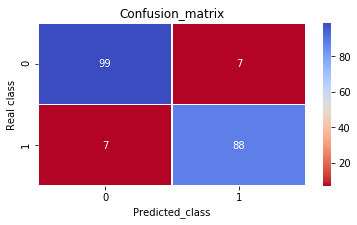


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.93      0.93       106
          1       0.93      0.93      0.93        95

avg / total       0.93      0.93      0.93       201

 ROC Curve: 


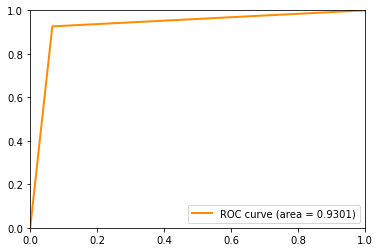

--------------------------Testing Set---------------------------
The recall for this model is: 0.930380
TP: 147
TN: 79109
FP: 6176
FN: 11


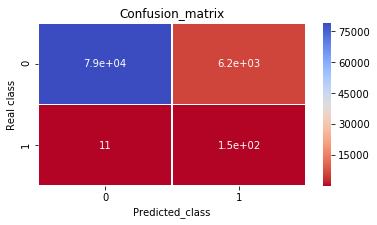


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.93      0.96     85285
          1       0.02      0.93      0.05       158

avg / total       1.00      0.93      0.96     85443

 ROC Curve: 


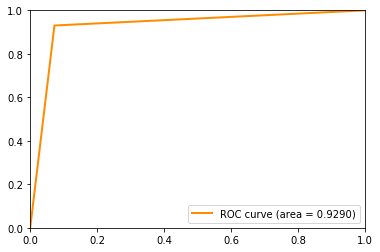

---------------------------------------------------------------
The undersample data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 701
Length of test data: 301
The recall for this model is: 0.847059
TP: 72
TN: 210
FP: 6
FN: 13


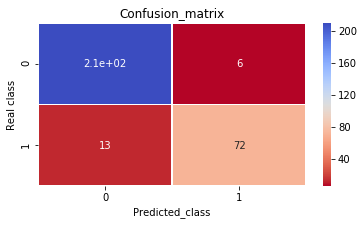


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.97      0.96       216
          1       0.92      0.85      0.88        85

avg / total       0.94      0.94      0.94       301

 ROC Curve: 


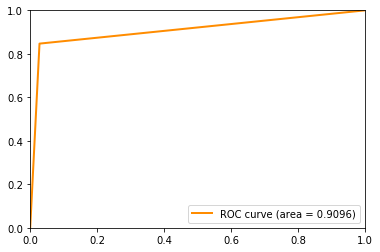

--------------------------Testing Set---------------------------
The recall for this model is: 0.924051
TP: 146
TN: 82884
FP: 2401
FN: 12


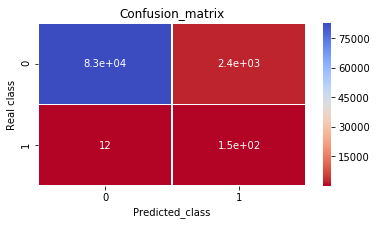


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85285
          1       0.06      0.92      0.11       158

avg / total       1.00      0.97      0.98     85443

 ROC Curve: 


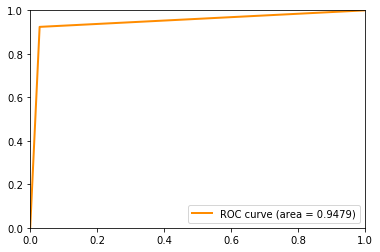

---------------------------------------------------------------
The undersample data for 3 proportion

The normal transacation proportion is : 0.750000
The fraud transacation proportion is : 0.250000

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 935
Length of test data: 401
The recall for this model is: 0.881818
TP: 97
TN: 288
FP: 3
FN: 13


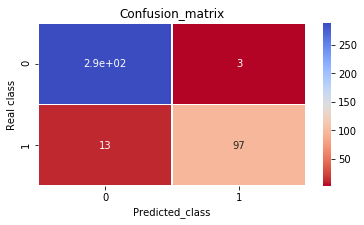


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       291
          1       0.97      0.88      0.92       110

avg / total       0.96      0.96      0.96       401

 ROC Curve: 


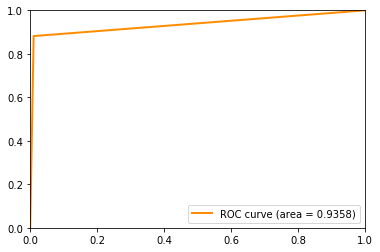

--------------------------Testing Set---------------------------
The recall for this model is: 0.886076
TP: 140
TN: 84358
FP: 927
FN: 18


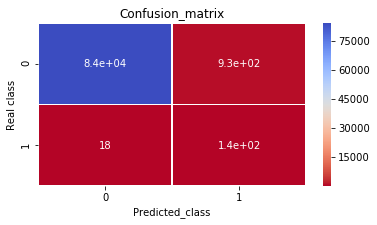


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85285
          1       0.13      0.89      0.23       158

avg / total       1.00      0.99      0.99     85443

 ROC Curve: 


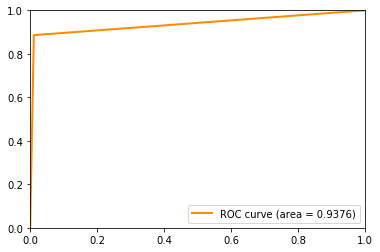

---------------------------------------------------------------


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve, roc_auc_score,classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print "The undersample data for " + str(i) + " proportion\n"
    Undersample_data = undersample(x_tr,i)
    print "\n----------------------Validation Set------------------------"
    print "\nThe model classification for " + str(i) + " proportion\n"
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print "--------------------------Testing Set---------------------------"
    model(clf,under_x,x_ts,under_yx,y_ts)
    print "---------------------------------------------------------------"

Se obtuvo predicciones utilizando Regresión Logística y Undersample, probando el modelo sobre una muestra de validación que se extrajo de la propia muestra a la que se aplicó undersample (que no se usó en alimentación del modelo), y luego se probó con la muestra de testeo, que conserva el desbalance original. Esta última muestra es más autenticamente representativa de la realidad, y por tanto se estima que los resultados sobre ella son más relevantes que sobre la muestra de validación. 

Además de Matriz de Confusión y métricas antes descritas, se obtiene la Curva ROC y la estadística de Área Bajo la Curva ROC. Esta curva es la gráfica entre los ratios de falsos positivos y verdaderos positivos para distintos criterios de clasificación aportados por el modelo. Representa la transacción entre Precision y Recall, puesto que grafica como para capturar mas observaciones positivas es necesario aceptar más falsos positivos. Un modelo que adivine con un 50% de probabilidad tendría una curva ROC diagonal, por lo que el área bajo la curva ROC se acota de forma natural entre 0.5 y 1.  Dado que se está evaluando modelos de clasificación binaria que devuelven dos valores posibles, las curvas ROC obtenidas presentan tres vértices, correspondientes de izquierda a derecha a: predecir todo negativo, la predicción del modelo y predecir todo positivo. 

Se observa que el mayor Recall se obtiene con la muestra en proporción 1:1, pero el mejor área bajo la curva ROC y Precision (respecto a observaciones positivas) se obtuvieron para la muestra en proporción 1:3, medido en la muestra de testeo. Este comportamiento se explica al observar que en la medida que se aumenta el desbalance, el modelo se hace más reticente a declarar positiva una observación, reduciento así fuertemente los falsos positivos pero castigando con ello, aunque en menor medida, a los verdaderos positivos. 

Como modelo alternativo se ha seleccionado Random Forest, que consiste en el ensamblado de un conjunto (en este caso 25) predictores débiles, cada uno de los cuales utiliza el coeficiente de Gini para discriminar sobre un atributo aleatorio. 

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 477
Length of test data: 205
The recall for this model is: 0.870000
TP: 87
TN: 102
FP: 3
FN: 13


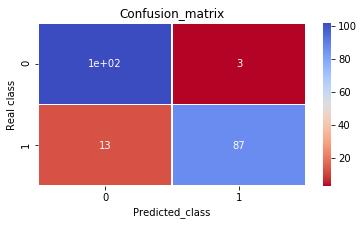


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       105
          1       0.97      0.87      0.92       100

avg / total       0.93      0.92      0.92       205

 ROC Curve: 


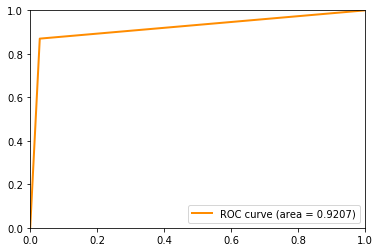

--------------------------Testing Set---------------------------
The recall for this model is: 0.900662
TP: 136
TN: 82675
FP: 2617
FN: 15


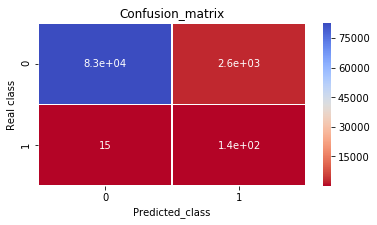


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85292
          1       0.05      0.90      0.09       151

avg / total       1.00      0.97      0.98     85443

 ROC Curve: 


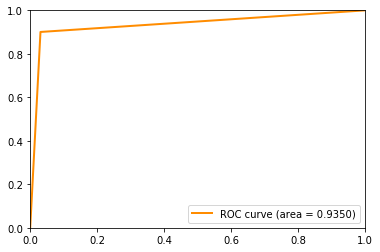

The undersample data for 2 proportion

The normal transacation proportion is : 0.666667
The fraud transacation proportion is : 0.333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 716
Length of test data: 307
The recall for this model is: 0.863158
TP: 82
TN: 210
FP: 2
FN: 13


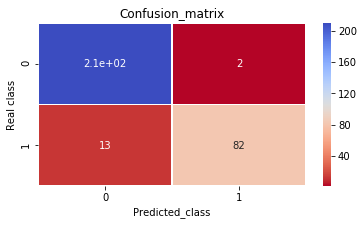


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       212
          1       0.98      0.86      0.92        95

avg / total       0.95      0.95      0.95       307

 ROC Curve: 


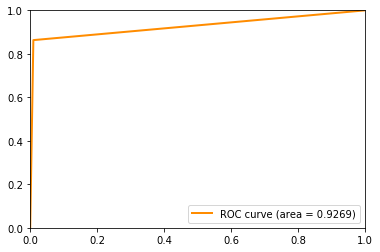

--------------------------Testing Set---------------------------
The recall for this model is: 0.894040
TP: 135
TN: 84031
FP: 1261
FN: 16


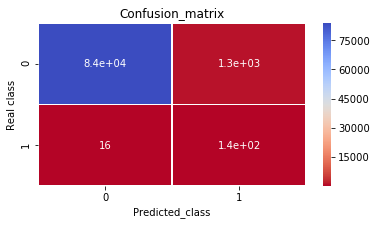


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85292
          1       0.10      0.89      0.17       151

avg / total       1.00      0.99      0.99     85443

 ROC Curve: 


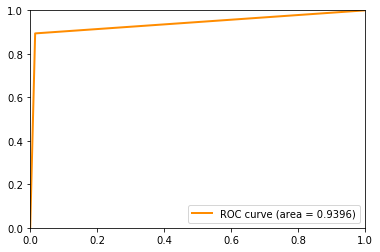

The undersample data for 3 proportion

The normal transacation proportion is : 0.750000
The fraud transacation proportion is : 0.250000

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 954
Length of test data: 410
The recall for this model is: 0.903846
TP: 94
TN: 305
FP: 1
FN: 10


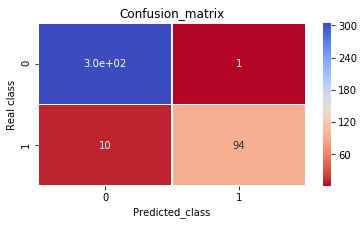


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       306
          1       0.99      0.90      0.94       104

avg / total       0.97      0.97      0.97       410

 ROC Curve: 


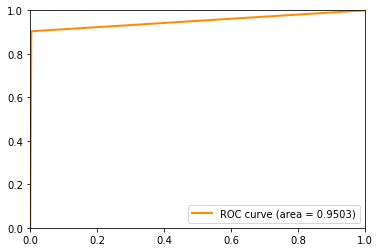

--------------------------Testing Set---------------------------
The recall for this model is: 0.880795
TP: 133
TN: 84488
FP: 804
FN: 18


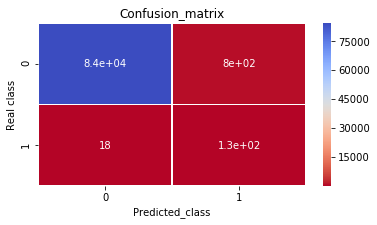


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85292
          1       0.14      0.88      0.24       151

avg / total       1.00      0.99      0.99     85443

 ROC Curve: 


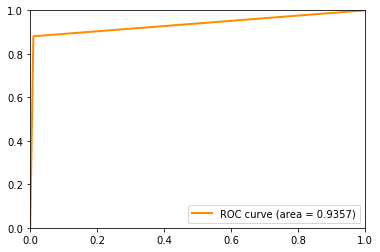

In [70]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_estimators=25, random_state=0)

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve, roc_auc_score,classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print "The undersample data for " + str(i) + " proportion\n"
    Undersample_data = undersample(x_tr,i)
    print "\n----------------------Validation Set------------------------"
    print "\nThe model classification for " + str(i) + " proportion\n"
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=RandomForestClassifier(n_estimators=25, random_state=0)
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print "--------------------------Testing Set---------------------------"
    model(clf,under_x,x_ts,under_yx,y_ts)

Repetido el experimento usando Random Forest, se aprecia un comportamiento similar en cuanto a que a mayor debalance se decae el Recall y mejora la Precision (respecto a las observaciones positivas). El área bajo la curva ROC, sin embargo, no mejoró consistentemente al aumentar el desbalance en la muestra. Cabe señalar que al existir aleatoriedad, los resultados se modifican en cada ejecución. 

(g) Vuelva a realizar los puntos (e) y (f), esta vez utilizando *OverSampling* [7] y SMOTE [8] (Hint: Para
SMOTE usted puede apoyarse de la libreria imblearn)

In [71]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_tr, x_ts, y_tr, y_ts = data_prepration(dt)
os_data_X, os_data_y = os.fit_sample(x_tr, y_tr)
os_data_X = df = pd.DataFrame(os_data_X)
os_data_X.columns = x_tr.columns
os_data_y = df = pd.DataFrame(os_data_y)
os_data_y.columns = y_tr.columns

Length of training data: 199364
Length of test data: 85443


/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------Testing Set---------------------------
The recall for this model is: 0.901408
TP: 128
TN: 83313
FP: 1988
FN: 14


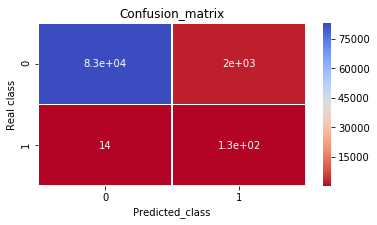


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85301
          1       0.06      0.90      0.11       142

avg / total       1.00      0.98      0.99     85443

 ROC Curve: 


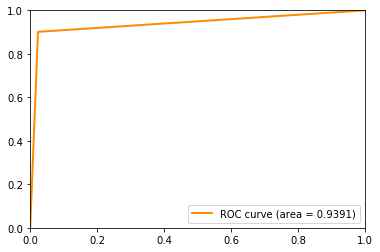

---------------------------------------------------------------


In [72]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
print "--------------------------Testing Set---------------------------"
model(clf,os_data_X,x_ts,os_data_y,y_ts)
print "---------------------------------------------------------------"

En esta ocasión se utilizó Oversample, técnica que consiste en crear observaciones sintéticas de la clase minoritaria, hasta alcanzar una muestra balanceada. Es importante que esta operación se realice después de haber extraído la muestra de testeo, puesto que en caso contrario se contaminará esta muestra con datos creados con observaciones presentes en la muestra de entrenamiento, invalidando el test. En este caso no se uso muestra de validación. 

En el caso de Regresión Logística se obtuvo un Recall menor al que se observó con Undersample y muestra balanceada. Precision y área bajo la curva ROC fueron similares con las dos técnicas de resampleo. 

Con Random Forest se obtuvo un modelo bastante más conservador, en el sentido de que decreto menos positivos con lo que tiene un Recall desmejorado, aunque logra una alta Precision (recibe pocos falsos positivos) y curva ROC todavía decente.

## Referencias

* [1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition. Springer New York Inc.
* [2] Joshi, M., Das, D., Gimpel, K., Smith, N. A. (2010). Movie reviews and revenues: An experiment in text regression. In the 2010 Annual Conference of the North American Chapter of the Association for Computational Linguistics (pp. 293-296). Association for Computational Linguistics.
* [3] https://www.kaggle.com/dalpozz/creditcardfraud
* [4] https://en.wikipedia.org/wiki/Stop words
* [5] https://en.wikipedia.org/wiki/Stemming
* [6] https://en.wikipedia.org/wiki/Lemmatisation
* [7] https://en.wikipedia.org/wiki/Oversampling and undersampling in data analysis
* [8] https://www.irjet.net/archives/V4/i8/IRJET-V4I857.pd